# Insurance Policy Claims:

© Explore Data Science Academy


# Introduction


# Problem Statement

The current claim assessment process faces challenges in achieving optimal accuracy, leading to inconsistencies and potential unfair outcomes for policyholders. There is a pressing need to enhance the accuracy of claim evaluations to ensure that all policyholders receive fair and consistent treatment, thereby addressing gaps in the existing system and fostering greater trust in the insurance claim resolution process.

add total loss - not only trying to fix customers (with losing), also helping company from prevnting loss



OR 


The current claim assessment process in the insurance industry faces challenges in achieving optimal accuracy, resulting in inconsistencies and potential unfair outcomes for policyholders. To address these issues and enhance the accuracy of claim evaluations, there is a pressing need to design and implement an advanced, technology-driven assessment system. 
##### This solution aims to leverage cutting-edge technologies, data analytics, and process optimizations to mitigate subjectivity in assessments, improve data utilization, handle the complexity of claims, streamline inefficient processes, ensure regulatory compliance, enhance fraud detection, improve customer communication, and modernize legacy systems. Through this comprehensive initiative, the goal is to establish a framework that ensures fair and consistent outcomes for all policyholders, fosters greater trust in the insurance claim resolution process, and addresses gaps in the existing system

 - PROBLEM : PEOPLE NOT GETTING THE CORRECT AMOUNTS 
 
 WITH OUR MODELLING, TRYING TO PREDICT CLAIM AMOUNTS
 
SOLUTION: 

NOT SURE WHAT OUR SOLUTION IS?

ARE WE CREATING ONE ENGINE TO COMBAT THE PROBLEM OR IS IT AN ARRAY AS IVE STATED ABOVE?

I was saying that we could base our solution around the idea of total claim amounts...our modeling approach focuses on predicting future claims to avoid issues like human error, time consuming processes like calculating the amount and the cause of this could also be one of the mentioned points in your solution



The insurance industry's claim assessment process faces challenges in achieving optimal accuracy, leading to inconsistencies and potential unfair outcomes for policyholders. A proposed solution involves adopting a total loss perspective, not only fixing losses for customers but also proactively preventing them. Addressing inaccuracies in claim amounts, the solution advocates for a predictive modeling approach utilizing advanced technologies and data analytics.

This initiative is not only beneficial for policyholders but also for insurance companies. By forecasting future claims, it aids in minimizing human errors, streamlining time-consuming processes, and optimizing overall accuracy. The comprehensive strategy aims to reduce subjectivity, enhance data utilization, manage claims complexity, ensure regulatory compliance, detect fraud, improve customer communication, and modernize legacy systems. The ultimate goal is to establish a robust framework that predicts claim amounts, addresses root causes of inaccuracies, and fosters fair and consistent outcomes. This approach builds trust not only among policyholders but also strengthens the credibility and efficiency of insurance companies offering these services.

In addressing the prevalent problem of policyholders not receiving accurate claim amounts, a proposed solution revolves around predictive modeling. This innovative approach involves leveraging advanced technologies, data analytics, and process optimizations to forecast future claim amounts. By doing so, the system seeks to mitigate the impact of human error, streamline time-consuming processes related to calculating claim amounts, and enhance overall accuracy. The integration of this modeling approach aligns with a comprehensive initiative that encompasses various facets, including minimizing subjectivity in assessments, optimizing data utilization, handling claims complexity, ensuring regulatory compliance, detecting fraud, improving customer communication, and modernizing legacy systems.

Importantly, this proposed solution is not only beneficial for policyholders but also for insurance companies. By predicting future claims, it helps minimize errors, streamline processes, and enhance overall accuracy. This comprehensive strategy aims to build trust among policyholders and concurrently strengthen the credibility and efficiency of insurance companies offering these services.

#### final prob statement?

The current state of the insurance industry's claim assessment process is marred by challenges that hinder the attainment of optimal accuracy. This situation gives rise to inconsistencies and the potential for unfair outcomes for policyholders. To rectify these issues and instill confidence in the claim resolution process, a critical need exists to bolster the accuracy of claim evaluations.

One avenue for improvement is the incorporation of a total loss perspective. This entails not only focusing on rectifying losses for customers but also proactively aiding the company in preventing such losses. By embracing an approach that considers total loss scenarios, the aim is to move beyond merely fixing problems after they occur and instead work towards averting them in the first place.


To address the prevalent issue of policyholders not receiving accurate claim amounts, a proposed solution revolves around predictive modeling. 

This innovative approach leverages advanced technologies, data analytics, and process optimizations to forecast future claim amounts, mitigating the impact of human error and streamlining time-consuming processes related to calculating claims. ** be more specific to the insurance claims to increase accuracey, efficinecy etc. 


The integration of this modeling aligns with a comprehensive initiative to minimize subjectivity in assessments, optimize data utilization, handle claims complexity, ensure regulatory compliance, detect fraud, improve customer communication, and modernize legacy systems. Furthermore, this solution benefits both policyholders and insurance companies, as it not only enhances overall accuracy but also contributes to minimizing errors, streamlining processes, building trust, and strengthening the credibility and efficiency of insurance services.

####

This integration aims to minimize subjectivity, optimize data use, ensure compliance, and modernize insurance processes. It benefits policyholders and insurers by enhancing accuracy, reducing errors, and strengthening overall efficiency and credibility.

*** edit last paragraph and make shorter

# Hypothesis

Implementing advanced artificial intelligence algorithms and machine learning models in the claim assessment process will significantly enhance accuracy, reduce inconsistencies, and mitigate potential biases, thereby fostering fair and consistent treatment for all policyholders. This integration of cutting-edge technology is expected to address the existing gaps in the claim evaluation system, ultimately leading to improved trust in the insurance claim resolution process.

#### I was saying that we could base our solution around the idea of total claim amounts...our modeling approach focuses on predicting future claims to avoid issues like human error, time consuming processes like calculating the amount and the cause of this could also be one of the mentioned points in your solution


mention what is causing issure - loss and customer not getting correct claim amount, inconsistent data and analytics and data cleaning and create predictions with models 

by picking the best model*** 

must mention data analytics and prediction - analysing and notticing inconsistencies able to get best results by using the best model - know data was not clean (if someone takes data as is and make rediction will miss a lot of info and would not know its inconsisent and therefore will continue to get incorrect claim amounts) 



#### final proposed hypothesis:

The integration of advanced artificial intelligence algorithms and machine learning models into the claim assessment process is anticipated to yield substantial improvements in accuracy, consistency, and fairness. By focusing on predicting total claim amounts and addressing issues such as human error and time-consuming processes in calculating claim amounts, this approach aims to enhance the overall effectiveness of the insurance claim resolution process. The hypothesis posits that leveraging cutting-edge technology, particularly through meticulous data analytics and the selection of the most suitable predictive model, will enable the identification and rectification of inconsistencies in the data. It is expected that by addressing issues related to loss prevention, inaccurate claim amounts, and inconsistent data, the implementation of this advanced modeling approach will result in a more reliable and trustworthy claim evaluation system, ultimately fostering greater confidence among policyholders in the insurance claim resolution process.

<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing </a>

<a href=#four>4. Exploratory Data Analysis(EDA)</a>

<a href=#five>5. Modelling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>


<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>


In [1]:
# Imports
# data libraries
import pandas as pd #data manipulation 
import numpy as np #manages lists 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualisation

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# wordcloud
from wordcloud import WordCloud

# warning library
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>

## 2. Loading Data

<a href=#cont>Back to Table of Contents</a>


In [2]:
# Load the Data from Explore public data repository

url = "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/insurance_claims.csv"

github_url = "https://github.com/Sigourney-Griffin/Integrated-Project/blob/main/insurance_claims.csv"

insurance_data = pd.read_csv(url)

In [3]:
# Initial Data Exploration
# Display the first few rows of the dataset
print(insurance_data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [4]:
# Summary statistics
print(insurance_data.describe(include='all'))

#NaN means no info in column - need to feed empty rows with more meaningful data 

        months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       2006-01-01   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000    

### Dataset Description

The dataset pertains to insurance claims and encapsulates a wide array of information, spanning from customer details to specific claim-related data. The dataset provides a comprehensive view of the factors and variables that might influence or be indicative of an insurance claim, especially in the context of __.

1. **Customer Details**: Essential demographics of the insured party such as their age, tenure as a customer, and geographical information.
2. **Policy Information**: Key details about the insurance policy, including the policy number, bind date, deductibles, and annual premiums. This section also touches upon the umbrella limit associated with the policy.
3. **Claim Details**: This segment offers a detailed view of the claim, including the date of the incident, type of incident, severity, and the total claim amount. It also contains information about the authorities contacted in the aftermath of the incident.
4. **Vehicle Information**: Data related to the insured vehicle, including its make, model, and the year of manufacture.
5. **Fraud Indicator**: A binary indicator signifying whether a particular claim was fraudulent.

The dataset presents a holistic view, making it an invaluable asset for any analytical endeavor aiming to understand, predict, or mitigate insurance claim returns and losses.

#need to fill in later 


<a id="three"></a>

## 3. Data Preprocessing

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Handling Missing Values

After identifying columns with missing values, we will take the following steps:

1. **Imputation**: For columns where missing values can be imputed, we'll use appropriate strategies like mean, median, or mode imputation, depending on the column's nature.
2. **Dropping Values**: For columns where imputation might not be appropriate, or if the missing values are significant, we may opt to drop those values or the entire column.
3. **Data Integrity Checks**: Ensure that the data, post-imputation, remains consistent and accurate.


### Other Preprocessing Steps

We'll undertake several preprocessing steps to prepare our data for modeling:

1. **Encoding Categorical Variables**: Convert categorical variables into a format suitable for machine learning models.
2. **Handling Outliers**: Identify and treat outliers in the dataset.
3. **Feature Scaling**: Ensure that features are on a similar scale.
4. **Feature Engineering**: Create new features or transform existing ones to improve model performance.


In [5]:
# Check for missing values - shows which data contains no infomation 
missing_values = insurance_data.isnull().sum() #take sum of empty rows and print how many are empty
print("Missing values per column:\n", missing_values)

Missing values per column:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0


<a id="four"></a>

## 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Data Visualization


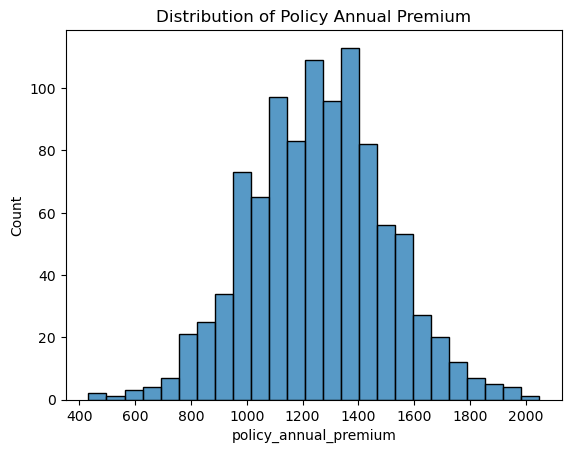

In [6]:
# Distribution of Policy Annual Premium
sns.histplot(insurance_data['policy_annual_premium'])
plt.title('Distribution of Policy Annual Premium')
plt.show()

The histogram depicting the distribution of policy annual premiums in the insurance data offers insightful observations for the project landscape. This visual representation aids in understanding policyholder preferences, identifying outliers that may have implications for claim assessments, and aligning premium levels with industry challenges. The premium distribution data is particularly relevant to resource allocation and training for claim assessors, as it provides a nuanced view of market trends and customer behaviors associated with different premium ranges. Moreover, the graph indirectly connects to customer expectations and satisfaction, emphasizing the need for insurers to tailor their claim assessment processes accordingly. Leveraging this information in advanced analytics and decision-making strategies can enhance the accuracy of claim assessments and contribute to addressing the broader challenges within the insurance industry.

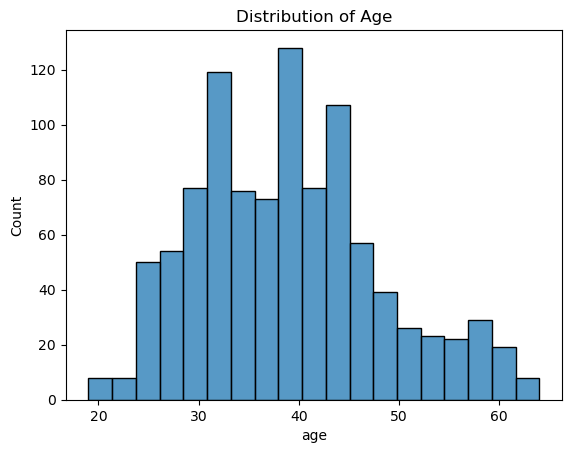

In [7]:
# Distribution of Age
sns.histplot(insurance_data['age'])
plt.title('Distribution of Age')
plt.show()

In examining the distribution of age in the insurance dataset, a prominent observation is that the majority of policyholders are concentrated within the age range of 33 to 43, as indicated by the peak in the histogram. This finding suggests that individuals within this specific age bracket may either possess the financial means to afford the insurance policy or exhibit a heightened awareness of the necessity for insurance coverage. The concentration of policyholders in this age group holds implications for understanding the target demographic and tailoring insurance products and communication strategies accordingly. Moreover, this insight into age distribution aligns with industry challenges, such as addressing customer expectations and optimizing communication channels to effectively engage with individuals within the identified age range. The data on age distribution thus becomes a valuable component in crafting targeted and resonant approaches within the broader context of improving claim assessments and enhancing the overall insurance experience.

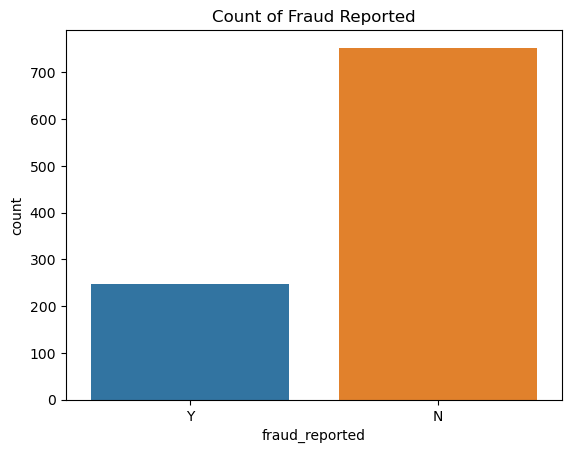

In [8]:
# Count of Fraud Reported
sns.countplot(x='fraud_reported', data=insurance_data)
plt.title('Count of Fraud Reported')
plt.show()

The count plot illustrating the reported instances of fraud in the insurance dataset reveals a crucial aspect of the claim assessment landscape. The observation that fraud is reported but not necessarily solved suggests a potential inconsistency in data, as it implies that not all reported cases may have been elevated to law enforcement or confirmed as criminal activities. This inconsistency underscores the importance of refining fraud detection mechanisms and addressing potential gaps in the reporting and resolution processes within the insurance industry.

Furthermore, the identification of certain demographics, as hinted at in the previous age distribution analysis, becomes even more significant in the context of fraud reporting. The concentration of reported fraud within specific age groups, as well as potential correlations with education levels, signifies that these demographics might be the target audience for more focused fraud prevention and education initiatives. Understanding the interplay between demographics and fraud reporting can guide insurers in tailoring their strategies to effectively mitigate fraud risks and enhance the accuracy of claim assessments.

In [9]:
# Further Analysis
# Average claim amount by fraud reported
avg_claim_by_fraud = insurance_data.groupby('fraud_reported')['total_claim_amount'].mean()
print("Average claim amount by fraud reported:\n", avg_claim_by_fraud)

Average claim amount by fraud reported:
 fraud_reported
N    50288.605578
Y    60302.105263
Name: total_claim_amount, dtype: float64


### Handling Missing Values

In our given dataset, some columns have missing values or placeholders that need addressing:

1. **Dropping Columns**: Columns that contain only missing values or don't provide valuable information can be dropped. The column `_c39` is one such column, which only contains missing values and hence will be removed.
2. **Replacing Placeholders**: The `police_report_available` column contains placeholders ('?') which we will replace with 'UNKNOWN' for clarity.
3. **Consistent Handling**: Ensure that if '?' is used as a placeholder in other columns, we apply consistent handling across the dataset.


### Unknowns and other special characters

In [10]:
# Replace '?' with 'UNKNOWN' in the 'police_report_available' column
insurance_data['police_report_available'] = insurance_data['police_report_available'].replace('?', 'UNKNOWN')
print(insurance_data['police_report_available'].value_counts())

UNKNOWN    343
NO         343
YES        314
Name: police_report_available, dtype: int64


In [11]:
insurance_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,UNKNOWN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,UNKNOWN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [12]:
# Calculate Q1, Q3, and IQR - determining anomalies 
# 
Q1 = insurance_data['total_claim_amount'].quantile(0.25)
Q3 = insurance_data['total_claim_amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

28780.0
41812.5
70592.5


In [13]:
# Define bounds - min & max data points 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Identify anomalies
anomalies = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 1


In [15]:
# Extract the anomalous record - try to find data 
anomalous_record = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(anomalous_record.transpose()) #switch matrics 

                                                  11
months_as_customer                               447
age                                               61
policy_number                                 214618
policy_bind_date                          1999-05-29
policy_state                                      OH
policy_csl                                   100/300
policy_deductable                               2000
policy_annual_premium                        1137.16
umbrella_limit                                     0
insured_zip                                   615561
insured_sex                                   FEMALE
insured_education_level                  High School
insured_occupation                   exec-managerial
insured_hobbies                            skydiving
insured_relationship                  other-relative
capital-gains                                      0
capital-loss                                  -51000
incident_date                             2015

### Further Exploration


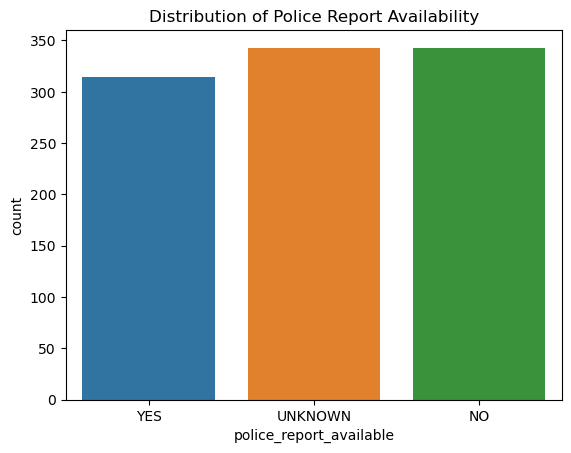

In [16]:
# Distribution Analysis # study of features
sns.countplot(x='police_report_available', data=insurance_data)
plt.title('Distribution of Police Report Availability')
plt.show()

The bar graph portraying the distribution of "police_report_available" reveals a substantial imbalance, with a prominent peak indicating a significant number of instances without a police report. This skew prompts concerns about potential challenges in subsequent data analysis and modeling, particularly if a police report is crucial for predictions. The visualization not only highlights data quality issues but also offers insights for decision-making, resource allocation, and policy considerations. It serves as a concise communication tool, conveying the prevalence of cases lacking a police report to stakeholders. Additionally, it instigates further exploration into correlations with other variables, such as incident severity or demographic information, and underscores the need to address the dataset's imbalance for more robust analyses

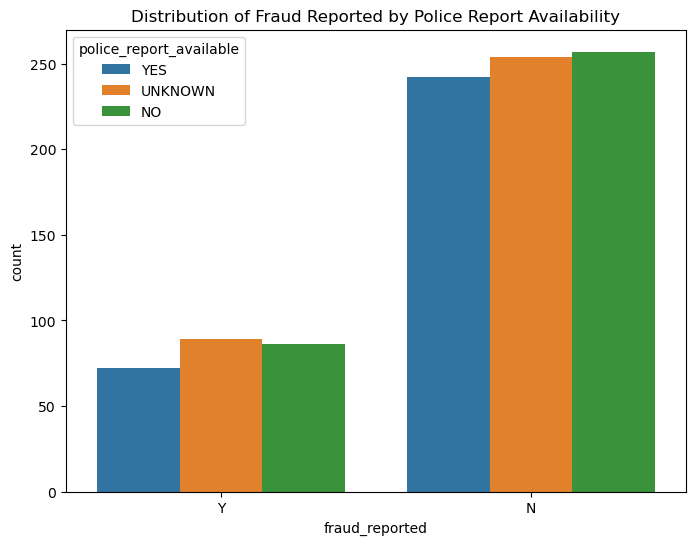

In [17]:
# Impact on Fraud Reporting
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', hue='police_report_available', data=insurance_data)
plt.title('Distribution of Fraud Reported by Police Report Availability')
plt.show()

The provided graph illustrates the distribution of reported fraud cases based on the availability of police reports, revealing a notable prevalence of cases without fraud reporting. The 'No' bar, representing instances where fraud was not reported, is larger, suggesting a substantial portion of the dataset did not involve fraud. Within this category, a significant proportion lacks a corresponding police report, indicating that cases without fraud reporting often do not require law enforcement involvement. Possible implications include the resolution of non-fraud cases without the need for police reports, potentially influencing operational processes for insurance companies and investigators. It is essential to consider data quality and variations in documentation when interpreting these findings, prompting further investigation into specific reasons for the absence or presence of police reports in cases without fraud reporting. In summary, the graph provides valuable insights for refining fraud detection and claims processing strategies in the insurance domain, emphasizing the need for deeper analysis and consideration of operational implications.

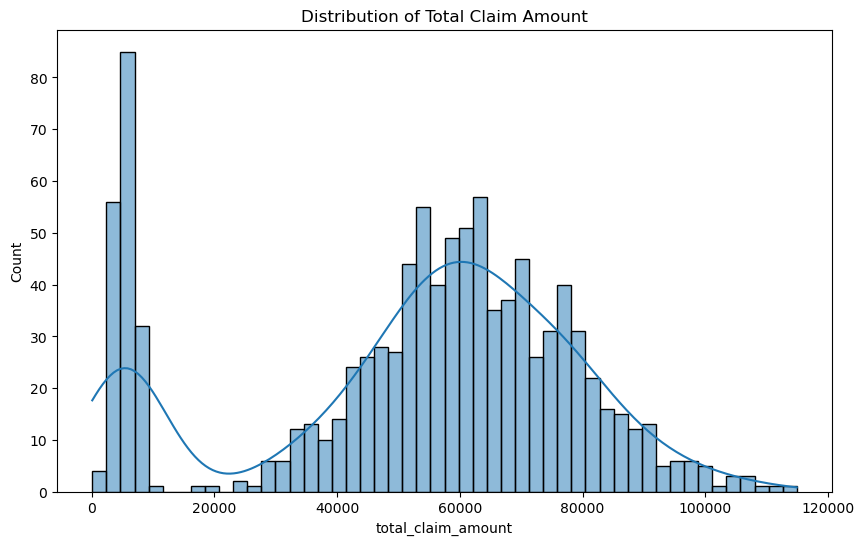

In [18]:
# Total Claim Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['total_claim_amount'], bins=50, kde=True) #
plt.title('Distribution of Total Claim Amount')
plt.show()

The histogram illustrates the distribution of total claim amounts in the dataset, revealing a right-skewed pattern with a concentration of claims on the lower end. Most claims fall within a relatively uniform range, suggesting a commonality in the magnitudes of these insurance claims. However, a noticeable outlier, represented by data points with total claim amounts exceeding 20,000, stands out as a deviation from the general trend. This outlier indicates the presence of a rare or extreme case, potentially involving a severe or unique insurance claim. Understanding the nature of this outlier could provide valuable insights into the factors influencing higher claim amounts. In analyzing the data, it is crucial to consider whether the total claim amounts align with industry norms, and further exploration, such as examining policy characteristics associated with higher claims, can contribute to a more comprehensive understanding of the dataset.

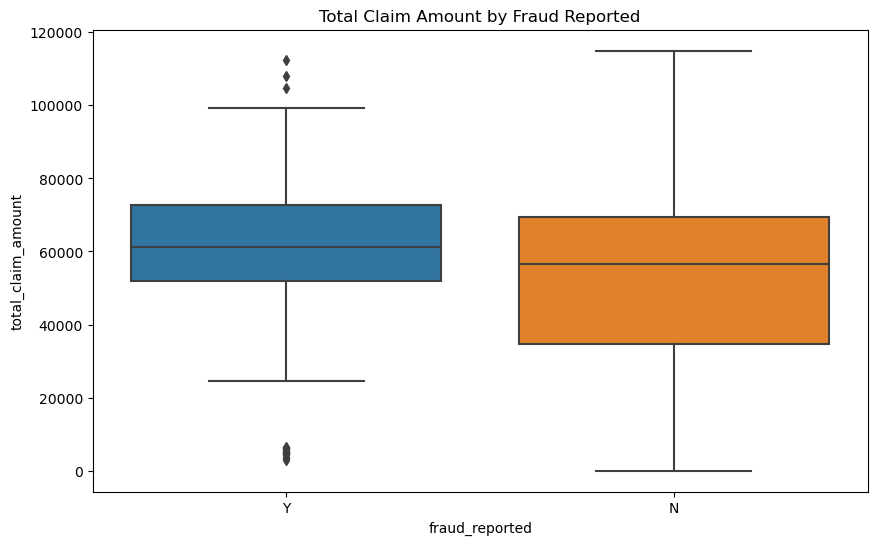

In [19]:
# Fraud Analysis - total claim amount 
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

The box-and-whisker plot illustrates the distribution of total claim amounts in the context of fraud reporting, specifically focusing on cases where fraud is reported as 'No.' The median line within the box signifies the midpoint of the total claim amount distribution for this category, providing a central measure for typical values. The interquartile range (IQR), represented by the box, encapsulates the central 50% of the data, offering insights into the variability of total claim amounts. Outliers, identified beyond the whiskers, may indicate unusual values requiring further investigation. The shape of the distribution within the box provides a sense of the data's skewness. Comparisons with cases where fraud is reported ('Yes') can highlight differences in median, IQR, and the presence of outliers. In summary, the box-and-whisker plot serves as a valuable tool for understanding the central tendency and variability of total claim amounts in instances where fraud is not reported, aiding in the identification of patterns relevant to fraud analysis in the insurance dataset.

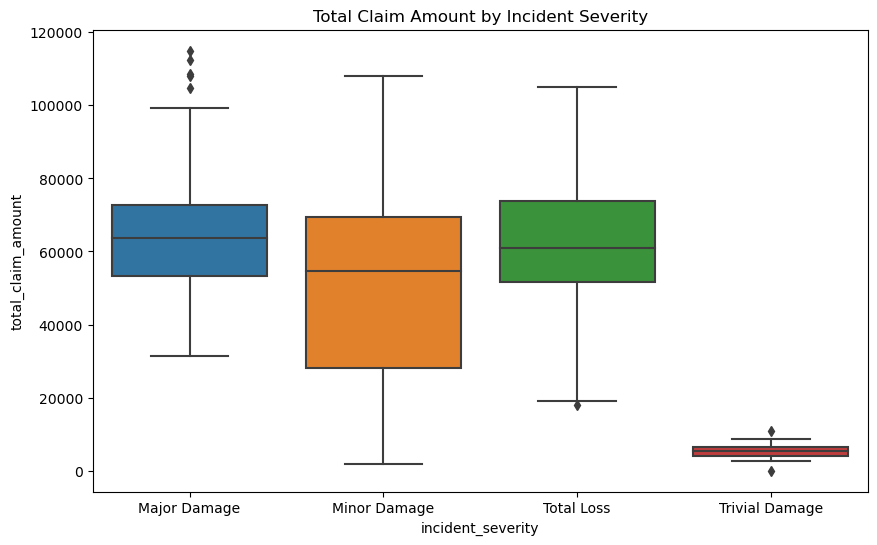

In [20]:
# Incident Severity Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_severity', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Severity')
plt.show()

The box-and-whisker plot reveals several insights into the relationship between incident severity levels and their corresponding total claim amounts in the insurance data. Notably, 'Minor Damage' incidents exhibit the largest box, suggesting a concentrated distribution of total claim amounts within a specific range, and the median line within this box provides a benchmark for typical claim amounts in this category. In contrast, 'Major Damage,' 'Total Loss,' and 'Trivial Damage' incidents show varying central tendencies, variabilities, and the presence of outliers, allowing for a nuanced understanding of how different incident severities impact the overall distribution of total claim amounts. Overall, the plot provides a comprehensive visual analysis, enabling stakeholders to identify patterns and make informed decisions related to incident severity and insurance claim amounts.

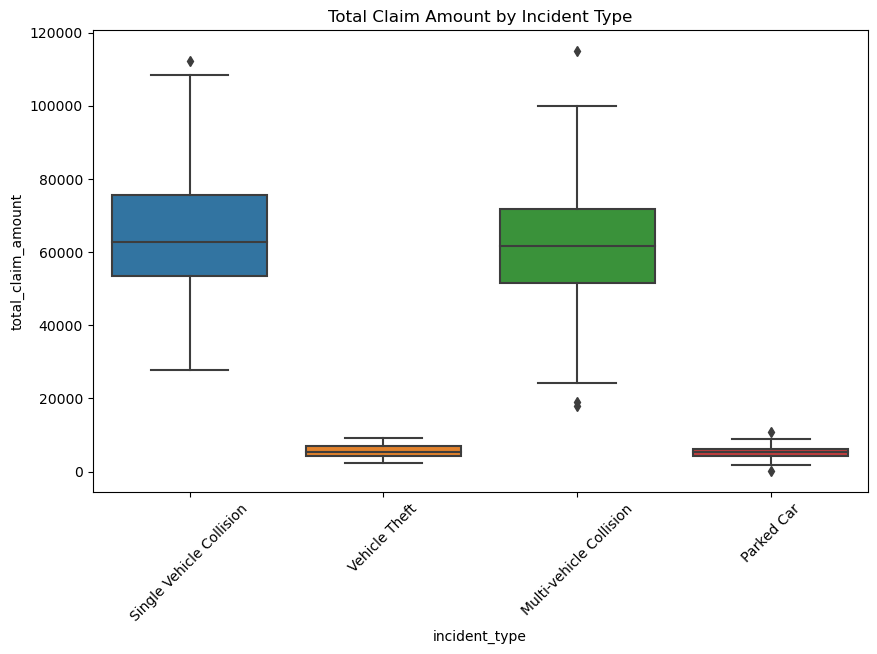

In [21]:
# Incident Type Analysis - by total claim amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_type', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Type')
plt.xticks(rotation=45)
plt.show()

The box-and-whisker plot, which analyzes total claim amounts categorized by incident types with a specific focus on 'Single Vehicle Collision' and 'Multi-Vehicle Collision,' demonstrates comparable median values, indicating similar average claim amounts for these two incident types. Both categories exhibit even distributions with similarly sized boxes, suggesting that the central 50% of total claim amounts is spread across comparable ranges. Notably, 'Single Vehicle Collision' and 'Multi-Vehicle Collision' stand out with the largest boxes among the incident types, emphasizing substantial concentration and variability in total claim amounts within their respective distributions. These characteristics can be attributed to various factors, including the inherent nature of incidents, the number of parties involved, the severity of damages incurred, differences in insurance coverage and policy limits, and the frequency of incidents within the dataset. Understanding these factors is crucial for insurers and analysts to make informed decisions regarding risk assessment, claims processing, and policy pricing. It enables a more nuanced interpretation of the data and assists in identifying patterns contributing to the observed characteristics in the box-and-whisker plot

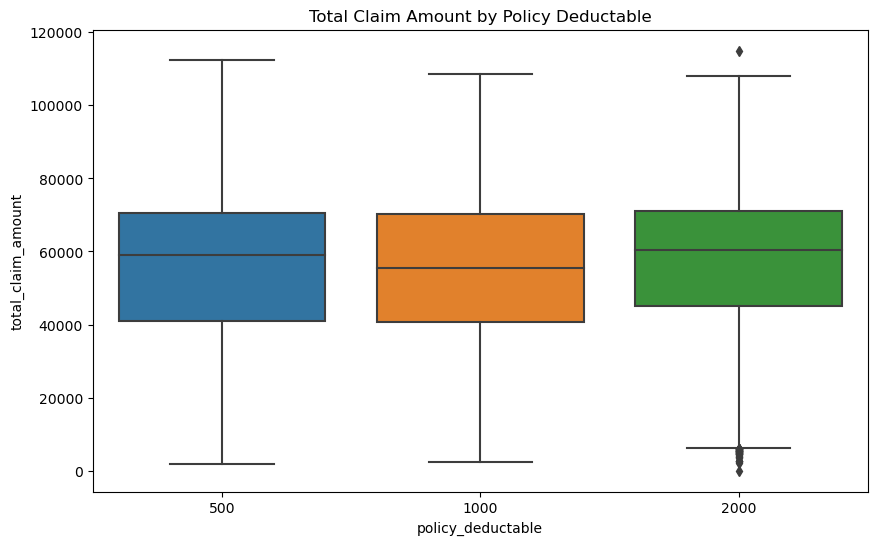

In [22]:
# Policy Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductable')
plt.show()

The box-and-whisker plot scrutinizing total claim amounts categorized by policy deductibles, specifically focusing on '500' and '1000,' provides crucial insights into the relationship between deductible levels and insurance claims. The plot reveals that the median total claim amounts for both '500' and '1000' deductibles are even, indicating comparable average claim amounts. The boxes for these deductibles are of similar sizes, suggesting consistent interquartile ranges (IQR) and an even distribution of total claim amounts within comparable ranges. This implies that policyholders with deductibles set at '500' and '1000' experience comparable claims, and the variability in total claim amounts is consistent between these two deductible categories. These observations could be influenced by factors such as policyholder behavior, similar risk perceptions, shared demographic characteristics, analogous policy design and premiums, and a comparable risk pool composition. Understanding these factors is crucial for insurers in tailoring policies, assessing risk accurately, and setting appropriate premium levels, ensuring a fair and consistent experience for policyholders with deductibles set at '500' and '1000.'

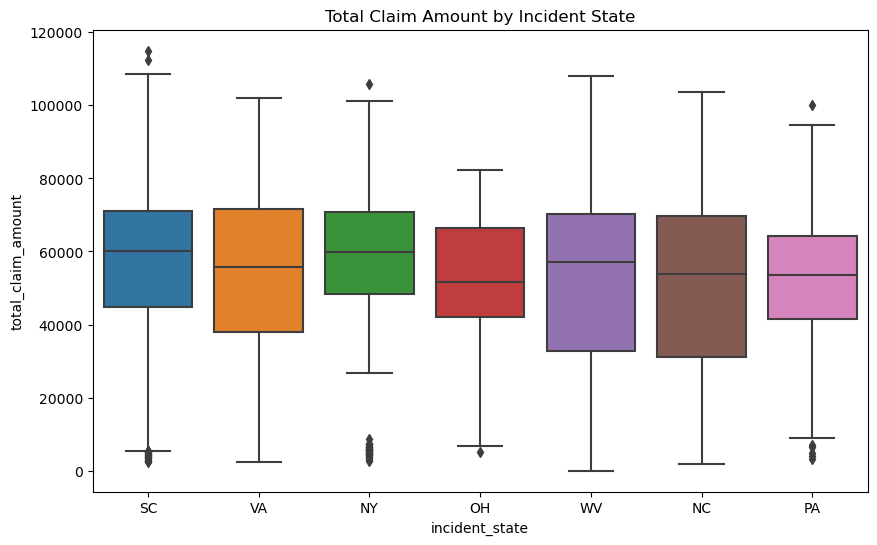

In [23]:
# Location Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident State')
plt.show()

The boxplot analysis of total claim amounts across different incident states reveals notable variability, with some states exhibiting wider variations in claims. Specifically, West Virginia, North Carolina, and Virginia display similar characteristics in terms of median total claim amounts and interquartile ranges, suggesting consistent patterns in these states compared to others in the dataset. To gain a more comprehensive understanding of these similarities, further analysis should consider factors such as the nature of incidents, demographic and economic influences, regulatory environments, insurance policy characteristics, geographical and climate considerations, claims processing efficiency, and cultural or social factors. Examining outliers in the data could provide insights into specific incidents or circumstances contributing to exceptional total claim amounts. This multidimensional approach will contribute to a nuanced and accurate understanding of the dynamics influencing insurance claims in West Virginia, North Carolina, and Virginia.

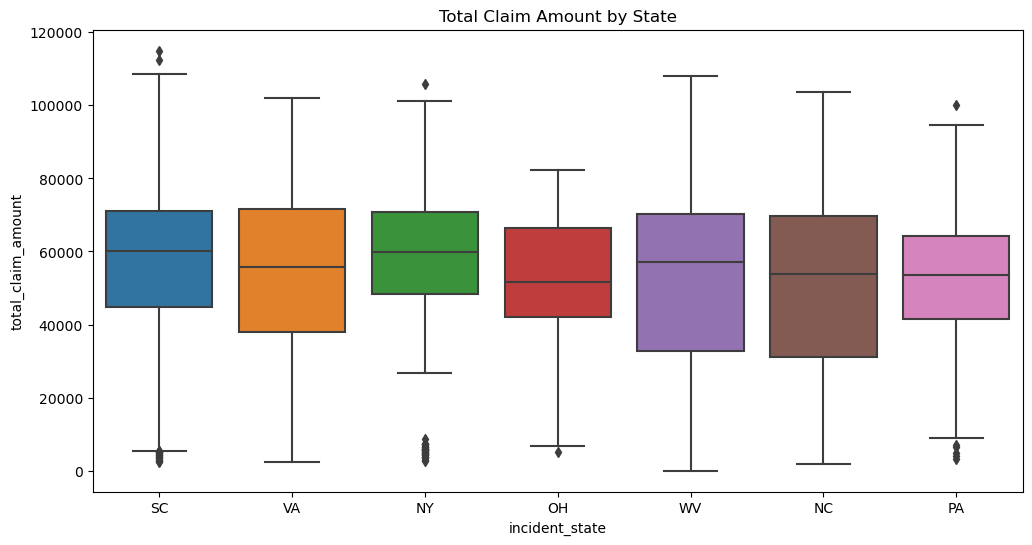

In [24]:
# Distribution of Claim Amounts by State and City
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by State')
plt.show()

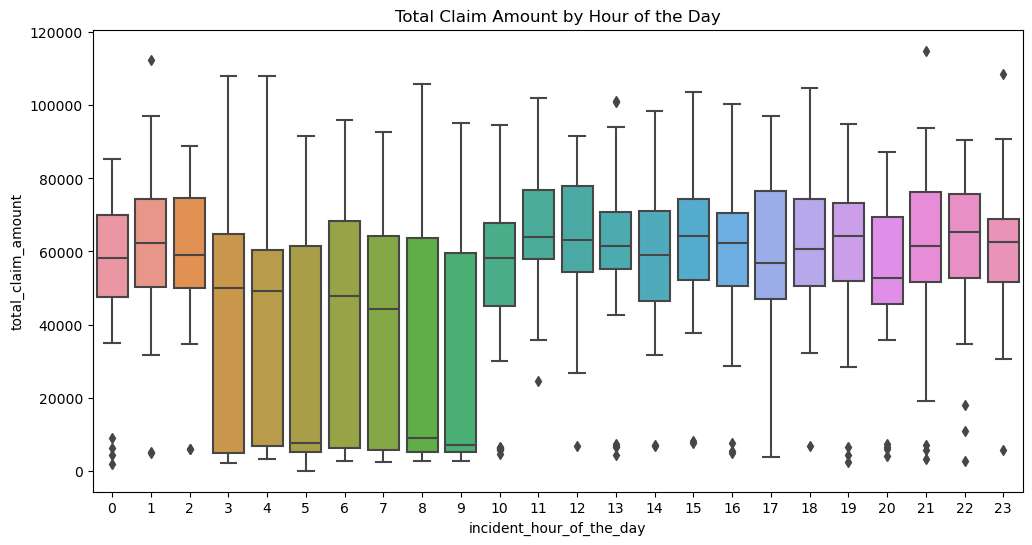

In [25]:
# Claim Amounts by Time of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_hour_of_the_day', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Hour of the Day')
plt.show()

The observed peak in insurance claims between 3 AM and 9 AM could be attributed to several factors. One potential explanation is the higher incidence of traffic accidents during early morning commutes, as this time frame coincides with increased road traffic as people head to work. Additionally, during these early hours, drivers and individuals may experience fatigue and reduced alertness, stemming from factors such as insufficient sleep or circadian rhythm effects, thereby elevating the risk of accidents and subsequent insurance claims. Weather conditions, including fog or dew on the roads in certain regions during the early morning, could further contribute to accidents and claims. It's crucial to consider whether the observed pattern is a statistical anomaly or if specific events during those hours contribute to higher claim amounts, accounting for potential fraud-related activities, such as staged accidents, which may be more likely to occur during specific times. Furthermore, variations in emergency services' response times during the early morning hours could impact the reporting and processing of claims. To gain more specific insights, a thorough investigation into the characteristics of claims during these hours, including incident types and locations, is recommended. Additionally, consulting domain experts and conducting a detailed analysis of the data, considering temporal patterns, categorical variables like fraud reports, driver behavior, and external factors, can provide a more comprehensive understanding of the observed pattern.

In [26]:
# Claim Amounts by Duration Since Policy Binding
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_since_policy_binding', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Days Since Policy Binding')
plt.show()

ValueError: Could not interpret value `days_since_policy_binding` for parameter `x`

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Claim Amounts by Car Make and Model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_make', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Car Make')
plt.xticks(rotation=45)
plt.show()

Toyota's higher frequency of accidents, as indicated by the dataset, could stem from various factors. It's possible that driving patterns, environmental conditions, and the behavior of Toyota drivers contribute to a heightened incidence of accidents. Moreover, the diversity among different Toyota models may lead to distinct characteristics influencing higher claim amounts—certain models might be more susceptible to specific accident types or incur elevated repair costs. Safety ratings and features across Toyota vehicles also play a role; lower safety ratings or the absence of advanced safety features might contribute to increased claims. Regional factors and driving conditions in areas where Toyota drivers operate may pose higher risks, thereby resulting in a greater number of accidents and subsequent insurance claims. Additionally, the demographic profile of Toyota drivers, including those associated with higher claim rates, may further contribute to the observed pattern. If the cost of repairs for Toyota vehicles is notably higher than other car makes, especially in incidents involving significant damage, it would naturally contribute to larger claim amounts. Lastly, the potential for Toyota drivers to operate in areas with higher traffic density or congestion might increase the likelihood of accidents, contributing to the overall trend of elevated insurance claims.

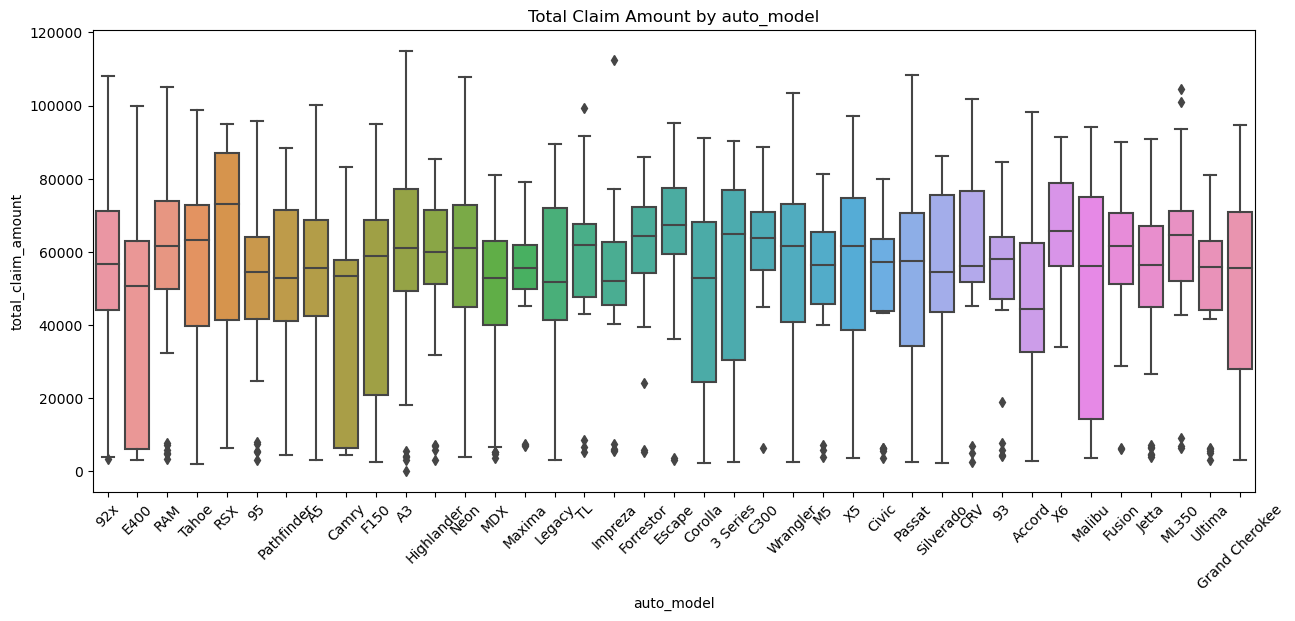

In [27]:
# Claim Amounts by auto_model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_model', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by auto_model')
plt.xticks(rotation=45)
plt.show()

The boxplot highlighting total claim amounts suggests not only variations in incident frequencies but also potential implications related to the cost of certain car models. It is plausible that some models, while cheaper, may be associated with their own set of problems, potentially impacting specific demographics. Lower-cost models might be more prevalent among certain groups, and their affordability could attract drivers with diverse driving habits or demographics that could contribute to a higher frequency of incidents. Analyzing the cost dynamics alongside demographic profiles and driving behaviors associated with each model is crucial for a comprehensive understanding of the observed patterns in incident rates.

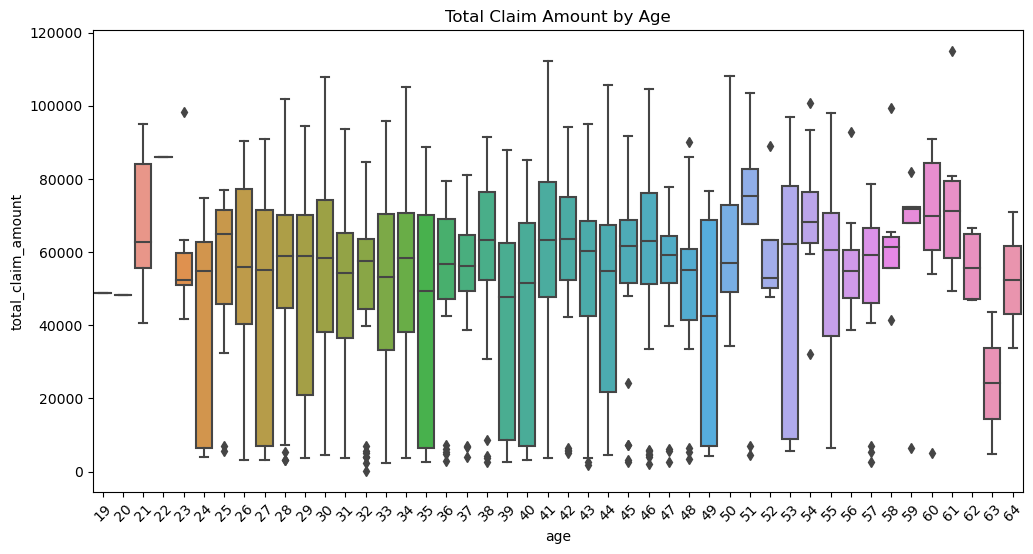

In [28]:
# Distribution of Claim Amounts by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Age')
plt.xticks(rotation=45)
plt.show()

The boxplot depicting the distribution of total claim amounts by age reveals a prominent trend, with individuals between the ages of 23 to 53 exhibiting a higher likelihood of claiming insurance. This phenomenon can be attributed to several factors. Firstly, this age range encompasses individuals who are typically in the midst of their working years, engaging in regular commutes for employment purposes. The increased time spent on the road for work-related activities elevates the risk of accidents, thereby contributing to a higher frequency of insurance claims. Additionally, this age group often represents individuals with families or households, leading to more frequent use of vehicles for family-related activities and responsibilities, which in turn increases the likelihood of claims. Furthermore, the driving behaviors within this age range may be influenced by a combination of driving experience, risk-taking tendencies, and financial stability. Younger drivers below the age of 23 may exhibit riskier behavior, while those above the age of 53 may adopt more cautious habits.

In [29]:
!pip install WordCloud

In [30]:
#takes in colum data (dataframe column) and produces images with no. of words that frequent the most in data - shows automake and correlates with claims that are made etc

def generate_wordcloud(column_data, title, ax):
    """
    Generate word cloud for a given column data.
    
    Parameters:
    - column_data: Data for which word cloud will be generated.
    - title: Title for the word cloud.
    - ax: Axes object on which word cloud will be plotted.
    """
    # Get word frequencies and keep top 20
    word_freq = column_data.value_counts().to_dict()
    word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20])
    
    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=16)

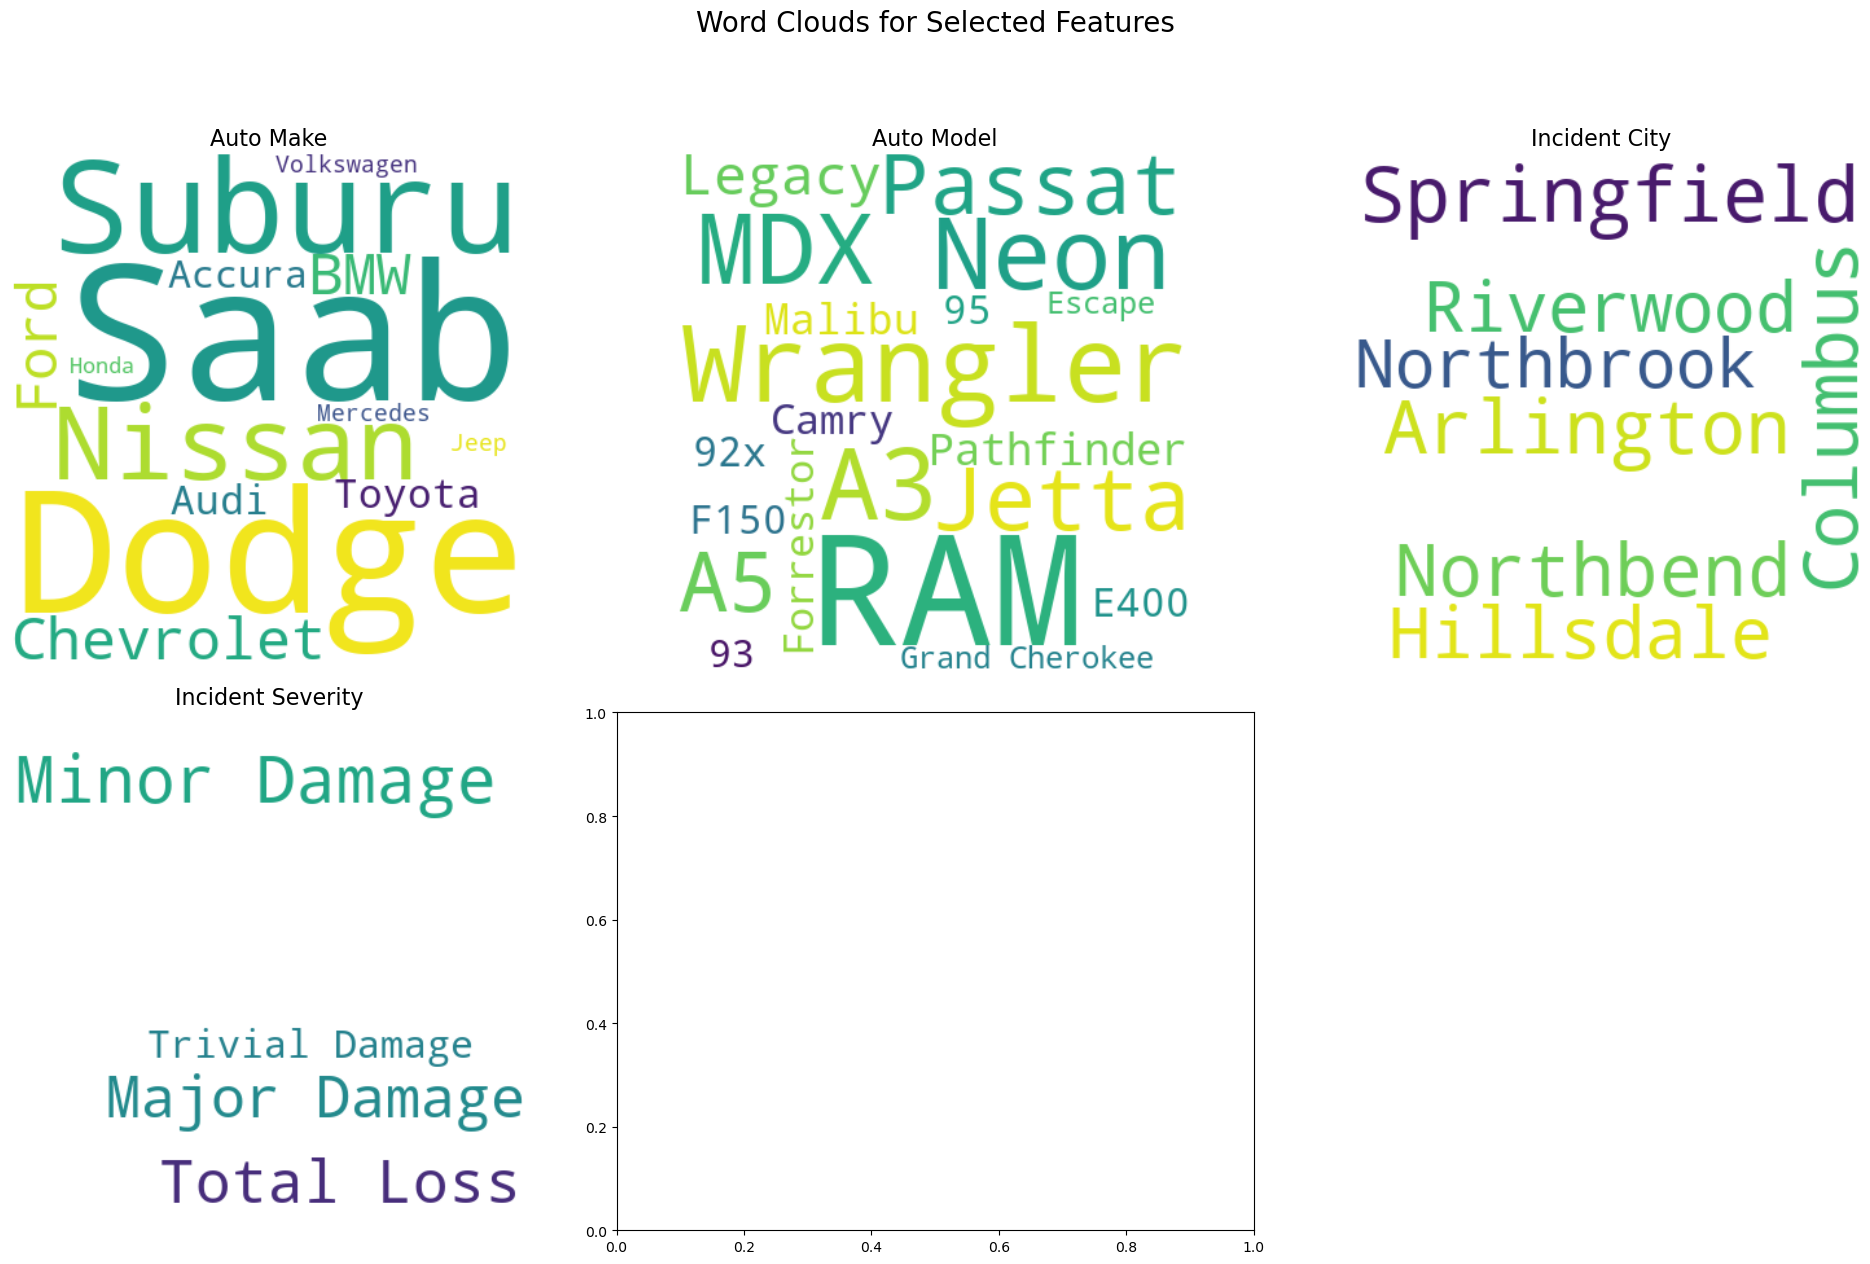

In [31]:
# plots wordcloud

from wordcloud import WordCloud

columns_to_viz = ['auto_make', 'auto_model', 'incident_city', 'incident_severity']

# Plotting word clouds
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Word Clouds for Selected Features', fontsize=20, y=1.05)

for i, col in enumerate(columns_to_viz):
    generate_wordcloud(insurance_data[col].dropna(), col.replace('_', ' ').title(), axes[i//3, i%3])

# Remove the last subplot which is extra
fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

show one or two wordclouds on power point - shows the most automake thereforre saying which owner is mst likely to claim insurance as well as which city in the USA has the most insurance claims 

The size of words in a word cloud serves as a visual representation of their frequency of occurrence within the dataset, offering immediate insights into the most common terms. Larger words not only indicate higher frequency but also signify the importance and relevance of specific terms within the context of the selected feature. The variability in word sizes across different features highlights the diversity and distribution of terms, with consistently larger words suggesting their centrality in those aspects of the data. Examining the 'incident city' feature, evenly sized words may suggest a uniform distribution of incidents across different cities, while standout city names could indicate hotspots or concentrations. Word clouds serve as a preliminary tool for data exploration and hypothesis generation, with larger words acting as starting points for in-depth analyses. Additionally, they facilitate visual storytelling, allowing stakeholders to quickly grasp key themes and trends within the insurance dataset. Hypothetically, if terms like 'Dodge' and 'RAM' appear larger, it could be due to factors such as brand popularity, specific claim types or incidents, market trends, preferences, or emphasized product offerings related to these terms within the dataset.

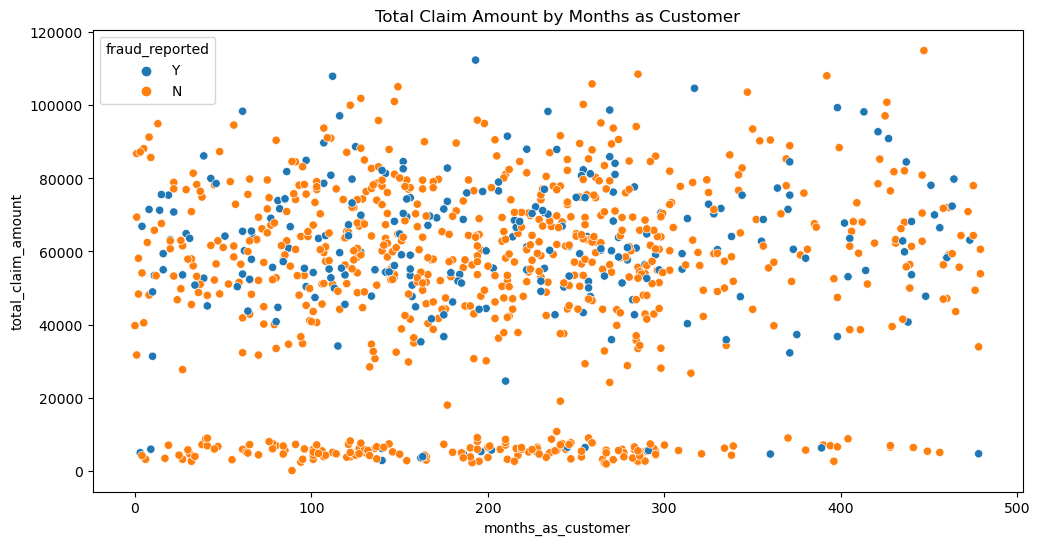

In [32]:
# Claim Amounts by Months as Customer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='months_as_customer', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Months as Customer')
plt.show()

The scatter plot depicting the relationship between 'months_as_customer' and 'total_claim_amount' reveals a lack of clear correlation, indicating that the duration of a customer's association with the insurance company does not straightforwardly impact the total claim amount. The scattered distribution of points implies the influence of various factors beyond customer tenure, contributing to the complexity of the relationship. Anomalies, particularly evident in total claim amounts below 20,000, suggest atypical cases that warrant further investigation for potential outliers or data anomalies. Given the intricacies observed, the plot underscores the need for a more nuanced analysis, considering additional variables such as coverage types and claim circumstances. The communication to stakeholders should emphasize the multifaceted nature of the relationship and the importance of exploring diverse factors to comprehensively understand the determinants of total claim amounts in the dataset

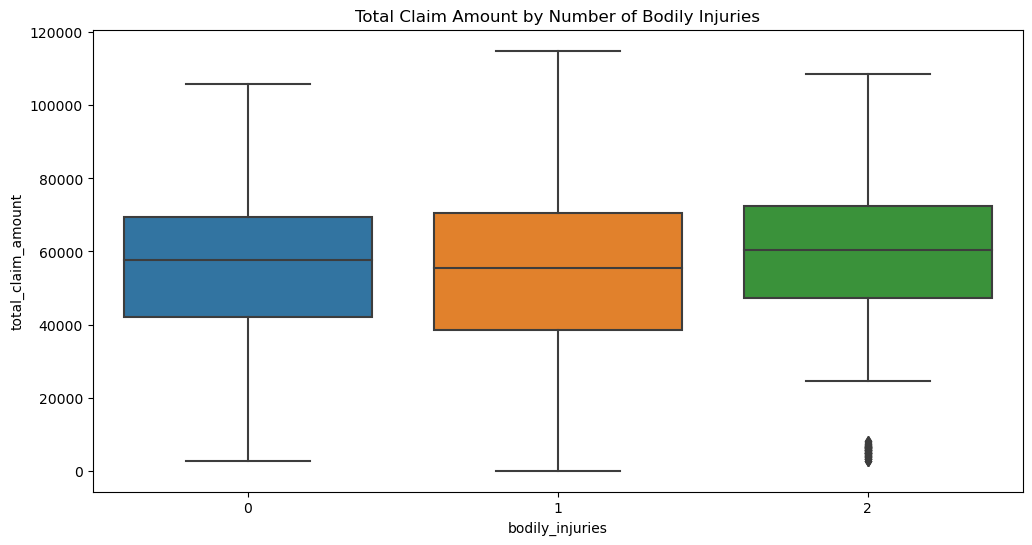

In [33]:
# Claim Amounts by Bodily Injuries
plt.figure(figsize=(12, 6))
sns.boxplot(x='bodily_injuries', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Number of Bodily Injuries')
plt.show()

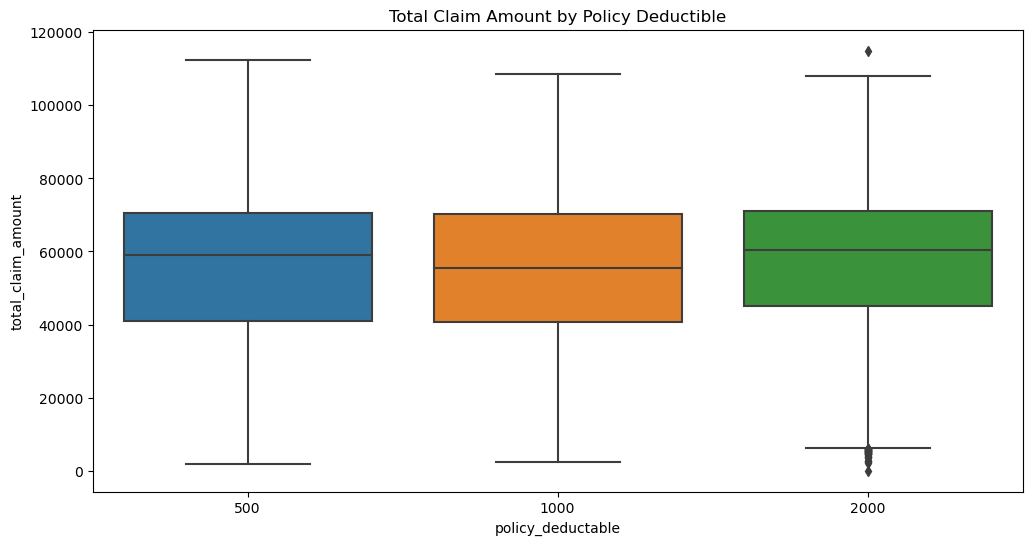

In [34]:
# Claim Amounts by Policy Deductible
plt.figure(figsize=(12, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductible')
plt.show()

The boxplot depicting the correlation between 'policy_deductable' and 'total_claim_amount' reveals significant insights into how different deductible levels influence total claim amounts in the insurance dataset. The plot demonstrates the variation in total claim amounts across various policy deductible levels, with higher deductibles associated with a broader spread of claim costs. Notably, the median claim amounts for '500' and '1000' deductibles are observed to be similar, suggesting that, on average, customers with these deductible levels experience comparable claim costs. This similarity in medians implies that the incremental change from a '500' to a '1000' deductible may not substantially impact the central tendency of claim amounts. The potential similarity between these deductible levels could be attributed to customer behavior and decision-making, where policyholders may perceive '500' and '1000' deductibles as relatively interchangeable. The identification of potential outliers in the plot also signals extreme claim amounts that merit further investigation.

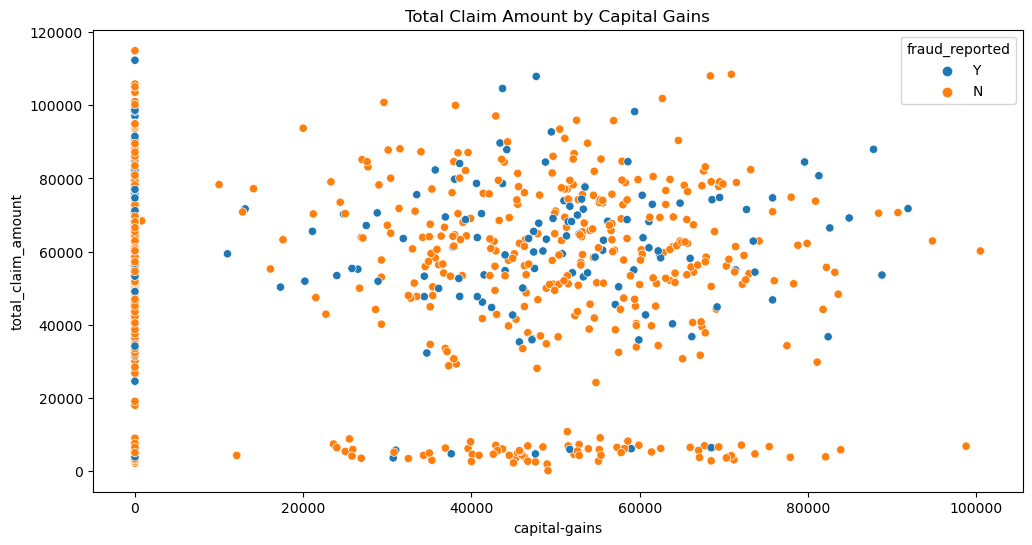

In [35]:
# Claim Amounts by Capital Gains
plt.figure(figsize=(12, 6))
sns.scatterplot(x='capital-gains', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Capital Gains')
plt.show()

The scatter plot depicts the relationship between 'capital-gains' and 'total_claim_amount' in an insurance dataset, with points color-coded based on fraud reporting. Notably, a considerable number of entries have zero 'capital-gains,' suggesting that many individuals did not report any such gains. Even among these cases, there is a diverse range of 'total_claim_amount,' indicating that factors beyond 'capital-gains' contribute to the total claim amount. Interestingly, instances exist where 'total_claim_amount' is high despite 'capital-gains' being zero, suggesting the influence of other significant factors. The color-coded points highlight patterns related to fraud reporting, showcasing cases with high 'total_claim_amount' and reported fraud, regardless of 'capital-gains.' The presence of zeros in 'capital-gains' raises questions about unique circumstances for individuals with zero gains. Further analysis may uncover specific factors affecting high 'total_claim_amount' when 'capital-gains' is zero

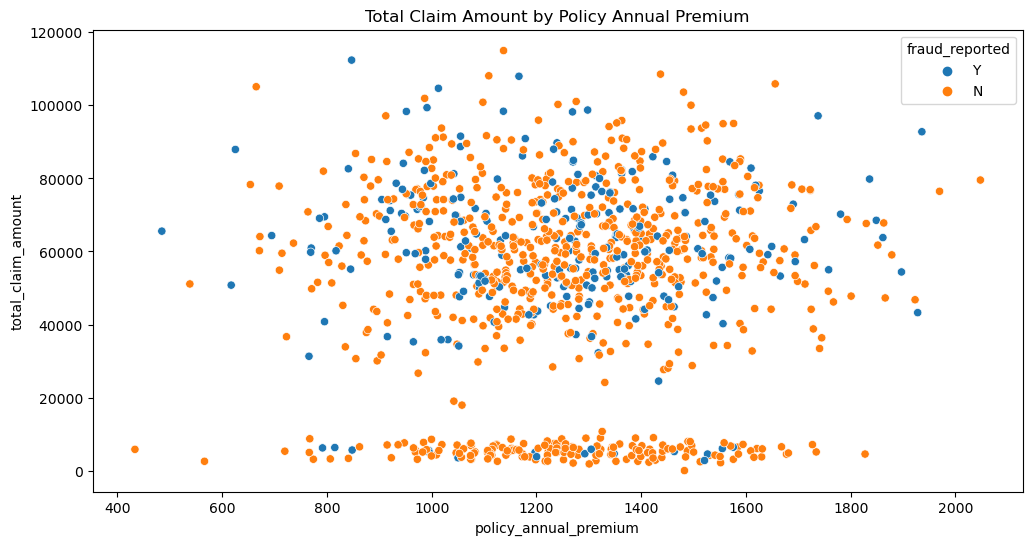

In [36]:
# Claim Amounts by Policy Annual Premium
plt.figure(figsize=(12, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Policy Annual Premium')
plt.show()

In [37]:
# Extract categorical variables
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

# Analyze the distribution of each categorical variable
categorical_distributions = {}
for column in categorical_columns:
    categorical_distributions[column] = insurance_data[column].value_counts()

cat_dist_df = pd.DataFrame(categorical_distributions)
cat_dist_df

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
100/300,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012 5th Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1028 Sky Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1030 Pine Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1087 Flute Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transport-moving,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unmarried,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video-games,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Claims and loss Analysis


focus on loss / what causes loss - compare against claims and check other features ie is loss bigger in a certain age group? sex? city? automake? education level? capital gains - higher loss = higher loss (corruption/ shady things happening) ill affect clients? maybe they arent trusting of the insurance companies ect. 

<a id="five"></a>

## 5. Modeling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


total claim is y varible 

x is a lot of features, noticed that (checked correlation) less than 61 more than 50% correlation 

dropped columns and x variables in that range to give best results 

give intro to modelling 

### Feature Engineering


In [38]:
def feature_engineering(df):
    """
    Apply feature engineering transformations to the provided dataframe.
    
    Parameters:
    - df: The dataframe to transform.
    
    Returns:
    - Transformed dataframe.
    """
    # Create a copy of the dataframe to avoid modifying the original one
    data = df.copy()
    
    # Convert 'policy_bind_date' and 'incident_date' to datetime
    data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
    data['incident_date'] = pd.to_datetime(data['incident_date'])
    
    # Handling Missing Values
    # Since the column '_c39' has all missing values, we can drop it
    data.drop(columns=['_c39'], inplace=True)
    
    # New columns
    df["Contract Years"] = df["months_as_customer"]/12
    df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']
    df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

    
    # Calculate 'days_since_policy_binding' feature
    data['days_since_policy_binding'] = (data['incident_date'] - data['policy_bind_date']).dt.days
    
    # Extract the month and day from 'policy_bind_date' and 'incident_date'
    data['policy_bind_month'] = data['policy_bind_date'].dt.month
    data['policy_bind_day'] = data['policy_bind_date'].dt.day
    data['incident_month'] = data['incident_date'].dt.month
    data['incident_day'] = data['incident_date'].dt.day
    
    
    # Drop the original 'policy_bind_date' and 'incident_date' columns
    data.drop(['policy_bind_date', 'incident_date'], axis=1, inplace=True)
    
    # Label encoding for columns you specified to retain their word values
    columns_to_encode = ['auto_make', 'auto_model', 'incident_city', 'incident_severity']
    
    for col in columns_to_encode:
        le = LabelEncoder()
        data[col + '_encoded'] = le.fit_transform(data[col])  # New encoded columns
    
    return data

In [39]:
# apply feature engineering function
insurance_data = feature_engineering(insurance_data)

In [40]:
insurance_data.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,fraud_reported,days_since_policy_binding,policy_bind_month,policy_bind_day,incident_month,incident_day,auto_make_encoded,auto_model_encoded,incident_city_encoded,incident_severity_encoded
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Y,100,10,17,1,25,10,1,1,0
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Y,3130,6,27,1,21,8,12,5,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,N,5282,9,6,2,22,4,30,1,1
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Y,8996,5,25,1,10,3,34,0,0
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,N,256,6,6,2,17,0,31,0,1


In [41]:
print(insurance_data['auto_make'])

0            Saab
1        Mercedes
2           Dodge
3       Chevrolet
4          Accura
          ...    
995         Honda
996    Volkswagen
997        Suburu
998          Audi
999      Mercedes
Name: auto_make, Length: 1000, dtype: object


In [42]:
# Encode categorical variables
label_encoders = {}
for column in insurance_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

In [43]:
# Split the data into training and testing sets
X = insurance_data.drop('fraud_reported', axis=1)
y = insurance_data['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Convert datetime columns to numerical representation
for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        earliest_date = X_train[col].min()
        X_train[col] = (X_train[col] - earliest_date).dt.days
        X_test[col] = (X_test[col] - earliest_date).dt.days

In [45]:
# Scale the numerical variables with a Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [49]:
# Check important features for exploration
importances = rf_model.feature_importances_

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 76.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       145
           1       0.57      0.49      0.53        55

    accuracy                           0.76       200
   macro avg       0.70      0.68      0.68       200
weighted avg       0.75      0.76      0.75       200



In [51]:
features = insurance_data.columns.drop('fraud_reported')
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                         Feature  Importance
18            incident_severity    0.122786
44    incident_severity_encoded    0.108800
12              insured_hobbies    0.057590
8                   insured_zip    0.035569
6         policy_annual_premium    0.034275
31               property_claim    0.033805
36    days_since_policy_binding    0.028451
2                 policy_number    0.027307
29           total_claim_amount    0.026458
22            incident_location    0.026429
0            months_as_customer    0.026118
30                 injury_claim    0.025934
1                           age    0.025588
32                vehicle_claim    0.024851
40                 incident_day    0.023317
38              policy_bind_day    0.021385
35                    auto_year    0.020793
11           insured_occupation    0.020572
41            auto_make_encoded    0.020257
42           auto_model_encoded    0.020111
23     incident_hour_of_the_day    0.019131
33        

### Data Visualization

After the feature engineering process, it's vital to visualize the data to understand its distribution, relationships, and patterns. Visualizations can provide insights that might not be apparent from raw data. Below are various types of plots that help us derive insights from the dataset.

still need to add some visualisations 


### Interpreting the Visualizations:

1. **Histogram**:

   - **Use**: Understand the distribution of a single variable.
   - **Observations**: Look for peaks (modes), spread, skewness, and outliers. Multiple peaks might indicate multiple groups within data. Skewness indicates the direction of the majority of data points.

2. **Box Plot**:

   - **Use**: Understand spread and central tendency.
   - **Observations**: Observe the median, interquartile range (IQR), whiskers, and outliers. A wide IQR indicates high variability. Outliers may indicate special cases or data entry errors.

3. **Scatter Plot**:

   - **Use**: Understand the relationship between two continuous variables.
   - **Observations**: Look for direction, form, strength, and outliers. A positive direction means as one variable increases, the other does too. Outliers may indicate special cases.

4. **Heatmaps**:

   - **Use**: Visualize matrix-like data or correlations between variables.
   - **Observations**: Darker colors typically represent higher values. In correlation heatmaps, darker cells indicate strong correlations which can be useful for feature selection.

5. **Pie/Donut Chart**:

   - **Use**: Understand the proportion of categories in a categorical variable.
   - **Observations**: Larger slices indicate more common categories.

6. **Violin Plot**:
   - **Use**: Understand distribution of data across categories.
   - **Observations**: Width indicates density. The white dot represents the median of the data.

#### 
IS THIS NECESSARY?

For each plot, it's crucial to ask: What patterns or anomalies are visible? How can these insights be useful for our goal?


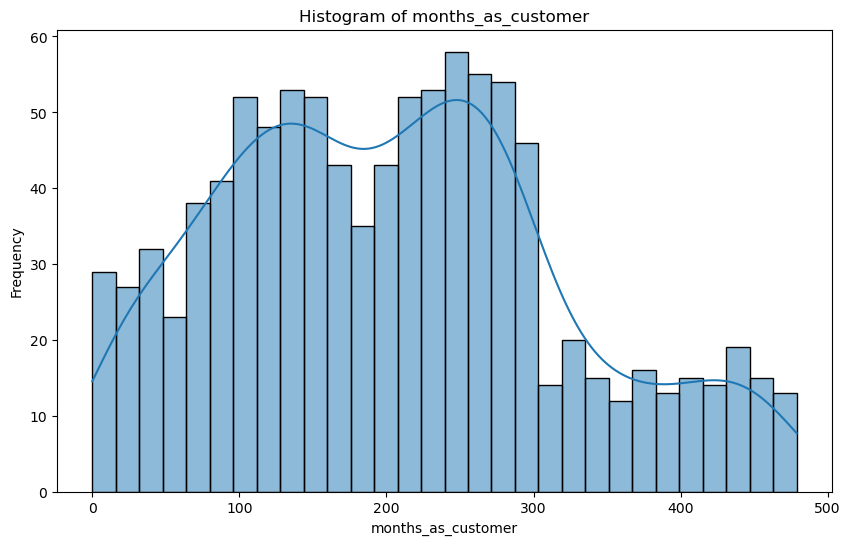

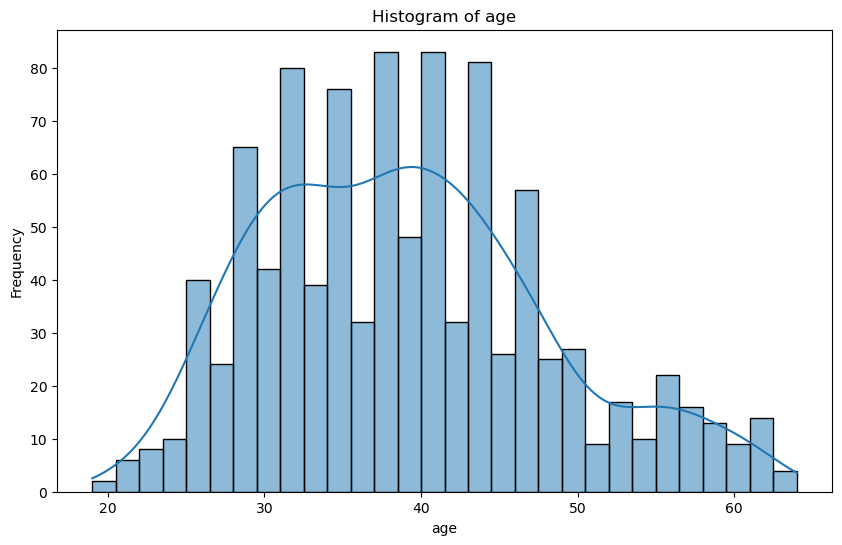

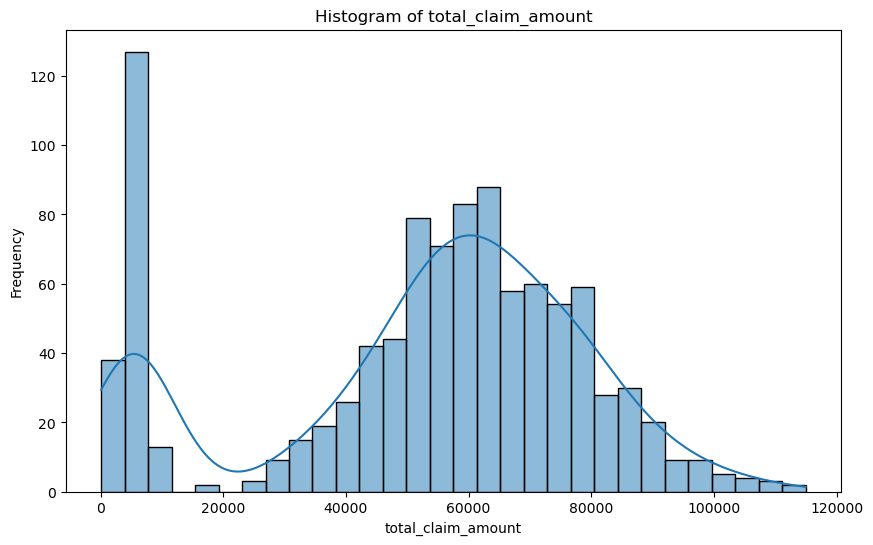

In [52]:
# Histograms for key numerical columns
numerical_columns = ['months_as_customer', 'age', 'total_claim_amount']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(insurance_data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [53]:
# Visualization for missing values
missing_values = insurance_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

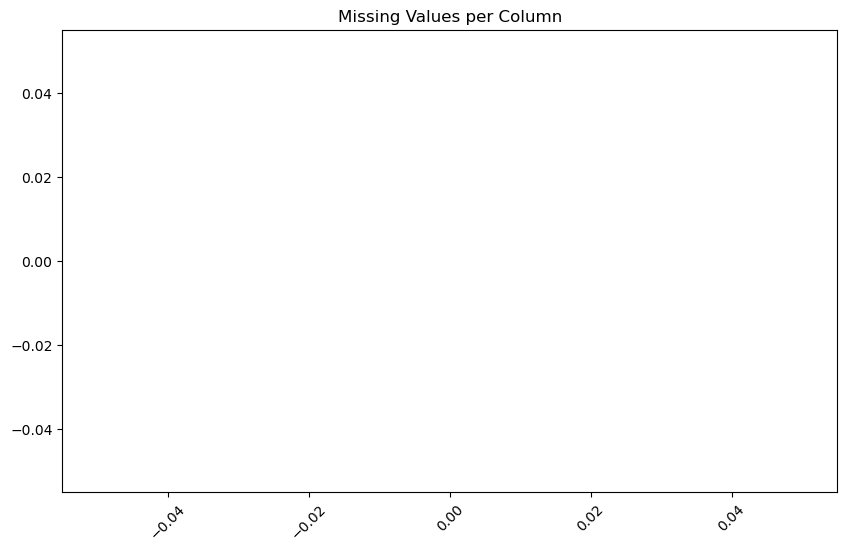

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.show()

From the bar plot, we can observe that there are no columns with missing values after cleaning the data


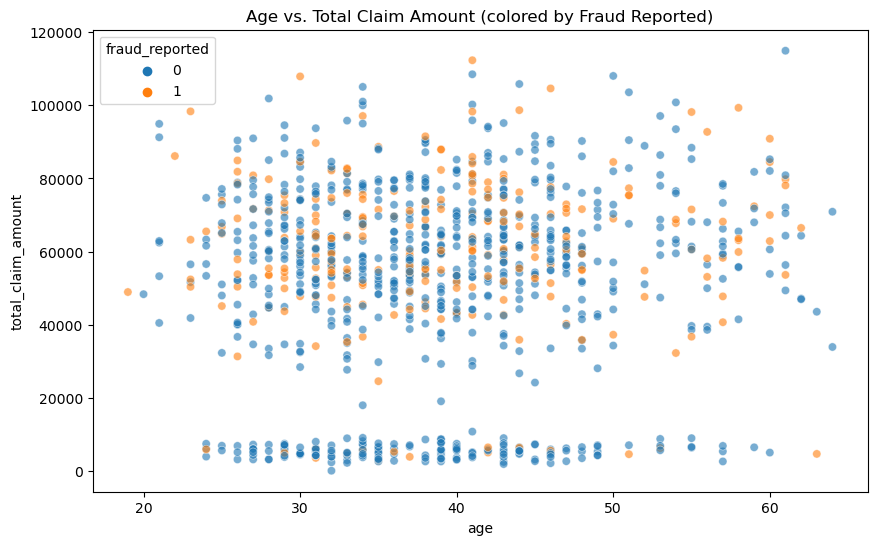

In [55]:
# Bivariate Analysis: Age vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', hue='fraud_reported', data=insurance_data, alpha=0.6)
plt.title('Age vs. Total Claim Amount (colored by Fraud Reported)')
plt.show()

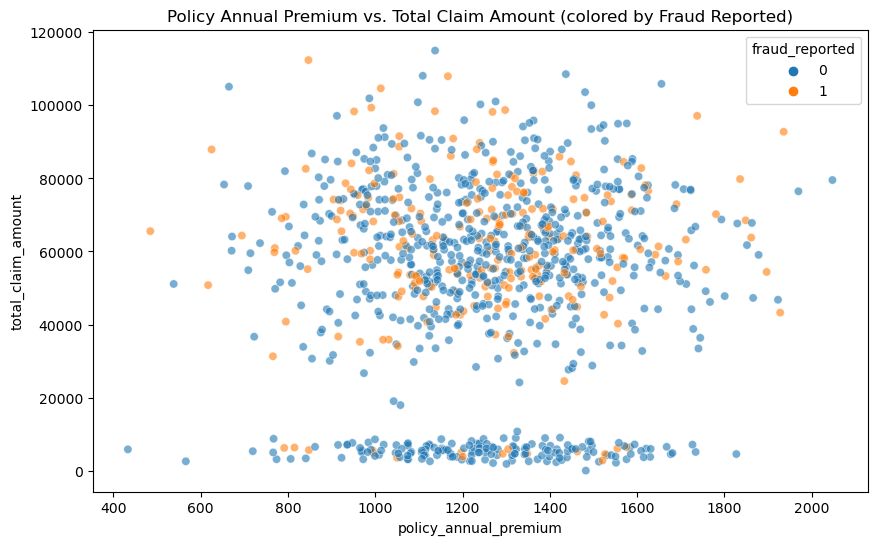

In [56]:
# Bivariate Analysis: Policy Annual Premium vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', hue='fraud_reported', data=insurance_data, alpha=0.6)
plt.title('Policy Annual Premium vs. Total Claim Amount (colored by Fraud Reported)')
plt.show()

From the scatter plots, we can observe relationships between age, policy annual premium, and the total claim amount. The color orange indicates claim was reported as fraudulent while blue is the opposite.


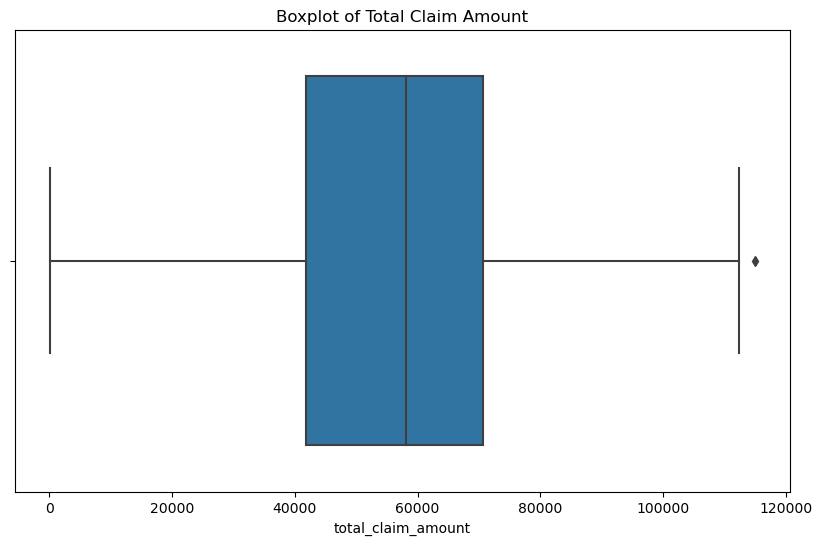

In [57]:
# Boxplot for total_claim_amount to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['total_claim_amount'])
plt.title('Boxplot of Total Claim Amount')
plt.show()

From the boxplot, we can observe potential outliers in the `total_claim_amount` column. Using the IQR method, we've calculated bounds to identify these outliers. The next steps would involve:


### Anomaly Detection in Total Claim Amount

Using the previously calculated IQR bounds, we identify anomalies in the `total_claim_amount` column. Let's examine these anomalies and determine their nature and potential impact.


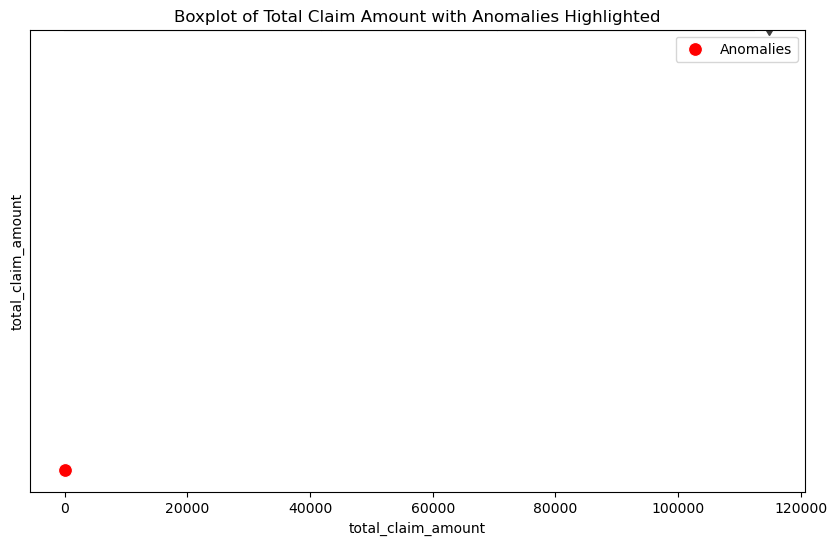

In [58]:
# Visualizing anomalies alongside the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['total_claim_amount'])
sns.scatterplot(x=anomalies.index, y=anomalies['total_claim_amount'], color='red', s=100, label='Anomalies')
plt.title('Boxplot of Total Claim Amount with Anomalies Highlighted')
plt.legend()
plt.show()

The red points in the plot represent the detected anomalies. These could be genuine outliers or valid but extreme cases. It's crucial to determine if these anomalies are errors or represent actual high claim amounts, as this can impact our analysis and modeling. Further investigation, possibly involving domain expertise, might be required to make this determination.


### Categorical Variables Analysis


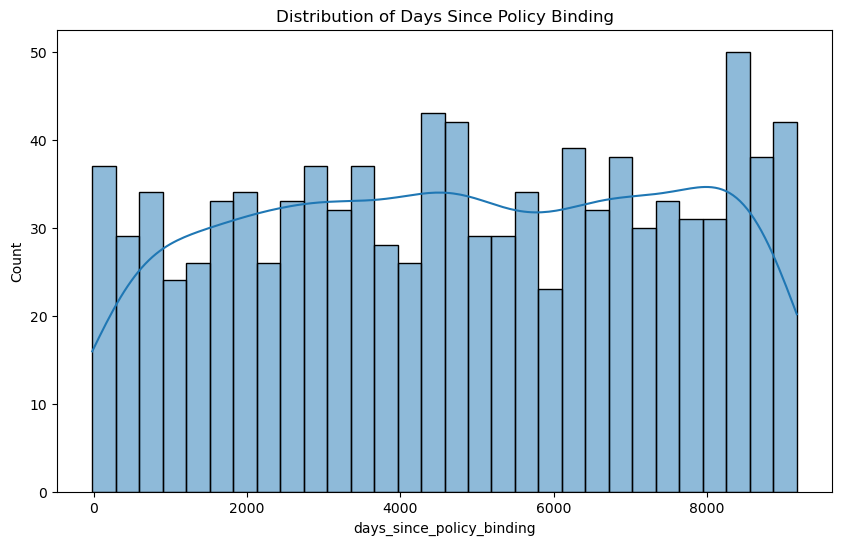

In [59]:
# Distribution of days_since_policy_binding
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['days_since_policy_binding'], bins=30, kde=True)
plt.title('Distribution of Days Since Policy Binding')
plt.show()

In [60]:
# Relationship with total_claim_amount


In [61]:
# Visualizing correlations with 'loss' using a bar plot


In [62]:
X = insurance_data.drop("variable to be picked", axis=1)
y = insurance_data["variable to be picked"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['variable to be picked'] not found in axis"

In [ ]:
logreg = LogisticRegression(max_iter=10000)

In [ ]:
svc = SVC()

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
gboost = GradientBoostingClassifier()

In [ ]:
models = [logreg, svc, dtree, gboost]
model_names = ["Logistic Regression", "SVC", "Decision Tree", "Gradient Boosting"]

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {name}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {svc}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {dtree}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {gboost}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

<a id="six"></a>

## 6. Model Evaluation

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


1. **Logistic Regression**:

   - **Accuracy**: __%
   - **Observation**: 

2. **SVC (Support Vector Classifier)**:

   - **Accuracy**: __%
   - **Observation**: 

3. **Decision Tree**:

   - **Accuracy**: __%
   - **Observation**: The model has a perfect score.

4. **Gradient Boosting**:
   - **Accuracy**: __%
   - **Observation**: 

**Recommendations**:

- **Validation**: 
- **Data Balance**: 

- **Hyperparameter Tuning**: 

- **Feature Importance**: 


how to make model better: give brief into why we do this

### Cross-Validation:


### RandomOverSampler:


### Hyperparameter Tuning for Gradient Boosting:


<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Random Forest Classifier

**Random Forest** is an ensemble learning method that creates a 'forest' of decision trees during training. When making predictions, it takes the majority vote from all the trees to determine the final output. This approach helps in achieving higher accuracy, as it reduces the risk of overfitting that a single decision tree might have.

- **Training**: The model is trained on the training data by creating multiple decision trees. Each tree is built using a subset of the data and features.
- **Evaluation**: The performance of the Random Forest classifier is evaluated on the test data using accuracy (percentage of correctly predicted instances) and a detailed classification report (which provides precision, recall, and F1-score for each class).

### Logistic Regression

**Logistic Regression** is a statistical model used for binary classification problems. It estimates the probability that a given instance belongs to a particular category.

- **Training**: The model learns the relationship between features and the target variable by adjusting its weights to minimize the difference between predicted probabilities and actual outcomes.
- **Evaluation**: The performance of the logistic regression model is evaluated on the test data using accuracy and a classification report.

### Support Vector Machine (SVM)

**SVM** is a powerful classification method that works by finding the hyperplane that best divides a dataset into classes. It's particularly useful for complex, non-linear relationships.

- **Training**: The SVM searches for the optimal hyperplane that separates the data points of different classes with the maximum margin.
- **Evaluation**: The model's performance is assessed using accuracy and a classification report on the test dataset.

### Gradient Boosting Classifier (using XGBoost)

**Gradient Boosting** is an ensemble learning method that builds multiple weak learners (typically decision trees) in a sequential manner. Each tree corrects the errors of its predecessor. **XGBoost** is an optimized gradient boosting library.

- **Training**: The model is trained iteratively, where each new tree tries to correct the errors made by the previous ones.
- **Evaluation**: The performance of the XGBoost classifier is evaluated on the test data using accuracy and a classification report.


<a id="eight"></a>

## 8. Conclusion

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Through our comprehensive analysis using various machine learning models on the insurance claim dataset, we've garnered several noteworthy insights:


1. **Data Imbalance**: The initial dataset was imbalanced, which could have led to biased results. Using techniques like SMOTE, we equalized the representation of each class, ensuring more reliable model predictions.


2. **Model Performance**:
   - **Random Forest Classifier**: 
   - **Logistic Regression**: 
   - **SVM**: 
   - **Gradient Boosting (XGBoost)**: 

3. **Feature Importance**: Using techniques like Random Forest, we can also gauge the significance of various features. This can guide the insurance company in understanding key factors affecting returns.


4. **Operational Use**: With further tuning and validation, these models can be integrated into the insurance claim processing pipeline, allowing for real-time fraud detection. This can significantly reduce the manual effort required in claim verification and potentially save millions in fraudulent payouts.


5. **Recommendations for Insurance Companies**:
   - **Claim Verification**: 
   - **Customer Profiling**: .
   - **Continuous Model Training**: As fraudsters evolve their tactics, it's crucial for the models to be trained on the latest data. Regularly updating the model will ensure it stays relevant and effective.


6. **Future Work**:



In [64]:
print(insurance_data.columns)
insurance_data.to_csv("./clean_data.csv")

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',
       'days_since_policy_binding', 'policy_bind_month', 'policy_bind_day',
       'incident_month', 'incident_day', 'auto_make_encoded',
       'auto_model_encoded', 'incident_city_encoded',
       'incident_severit